<h3>생선의 길이와 무게</h3>

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0] 
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

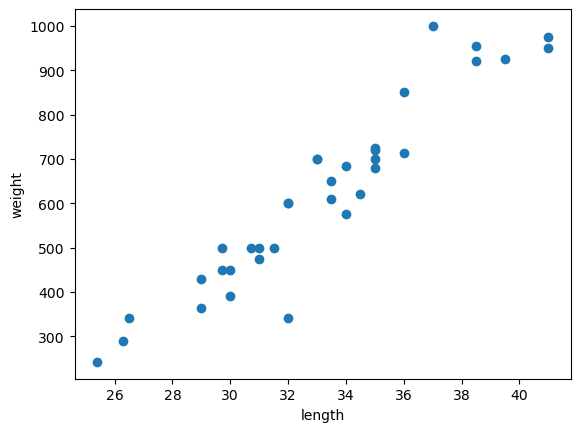

In [5]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

-> 길이가 길수록 무게가 많이 나간다

<h3>빙어 데이터 추가</h3>

In [7]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] 
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

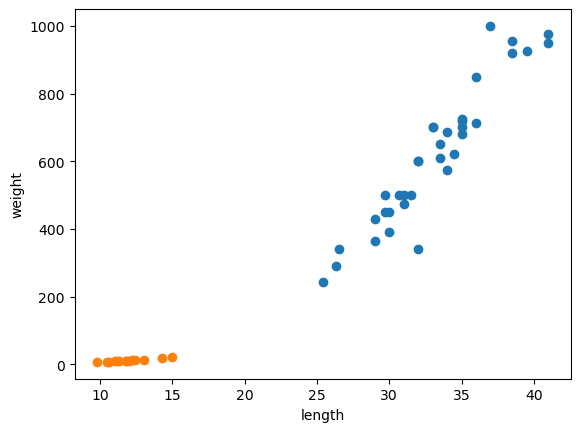

In [9]:
import matplotlib.pyplot as plt

plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h3>도미와 빙어 데이터 구분해보기</h3>

하나의 데이터로 합친다

In [74]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

사이킷런 사용<br>
각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원(행과 열) 리스트를 만든어야 한다

In [75]:
fish_data = [[l,w] for l,w  in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


데이터를 합친 상태에서 도미와 빙어를 구분하려면 정답 데이터 필요<br>
도미 = 1, 빙어 = 0

In [76]:
# 도미 35마리, 빙어 14마리
fish_target = [1] * 35 + [0] * 14


In [77]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

도미를 찾기 위한 기준을 학습<br>
fit은 훈련시키기<br>
score은 훈련이 잘되었는지 평가

In [78]:
kn.fit(fish_data,fish_target)
print(kn.score(fish_data, fish_target))

1.0


K의 기본값이 5<br>
만약 총 생선의 수를 49로 바꾸면?

In [79]:
# kn = KNeighborsClassifier(n_neighbors=5)
# kn.fit(fish_data,fish_target)
# print(kn.score(fish_data, fish_target))

ㄴ 정확도가 낮아졌다<br>
    적절한 K를 설정해주는 것이 중요하다.

<h3>훈련 셋과 데이터 셋 분리</h3>

In [80]:
import numpy as np

# 리스트를 넘파이로 변경
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

kn = KNeighborsClassifier(n_neighbors=5)<br>
K는 분류할 때 주변 값들과 최근접한 K개를 보고 분류를 하기 때문에 K는 존재하는 데이터보다 값이 작아야한다.<br>
모든 값을 최근접이라고 표현할 수 없기 때문이다.

In [88]:
# 무작위 샘플 데이터 선택
# 0~48개의 인덱스 중에 35개를 선택

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


<h3>predict메서드</h3>
새로운 데이터의 정답을 예측한다.<br>
kn.predict()

In [89]:
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

print(kn.predict(test_input))
print(test_target)

1.0
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


<h4>아래 산점도에 대해</h4>
[:,0] : 모든 행과 0번째 열 <br>
-> scatter을 이해하기 쉽게 설명하면 직선으로 그어야한다고 생각했을 때 어디서부터 어디까지 그을것인지의 값을 넣어야한다.<br>
-> 넘파이배열에 들어있는 순서대로(길이, 무게) [0],[1]<br><br>
오렌지색 : 훈련 데이터<br>
초록색 : 검증 데이터 <br><br>

아래 시각화 후<br>
훈련 데이터와 검증 데이터가 잘 섞여있는 것을 볼 수 있다.<br>
잘 섞여있는 것은 데이터가 랜덤으로 잘 섞여서 선택됐다는 것이다.<br>
즉, 한쪽에 치우치지않았다, 평가가 공정하다는 것을 의미한다.


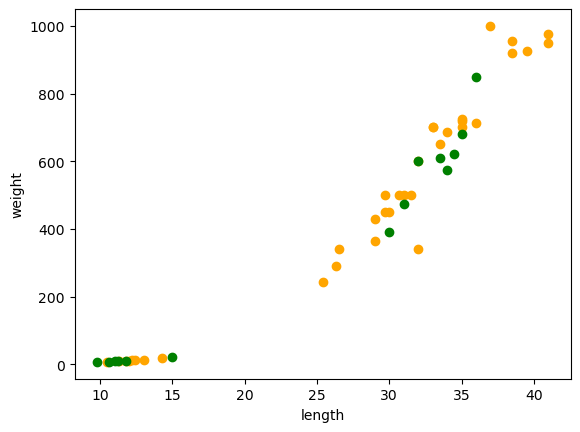

In [91]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0],train_input[:,1], c = 'orange', label='Train')
plt.scatter(test_input[:,0], test_input[:,1], c = 'green', label='Test')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h3>주의점</h3>

In [92]:
print(kn.predict([[25.0,150.0]]))

[0]


아래의 빨간 산점도를 보면 도미인데 빙어라고 판단한다.<br>
최근접 데이터에서 도미는 1개, 빙어가 4개이기 때문에 빙어로 예측하게된다.

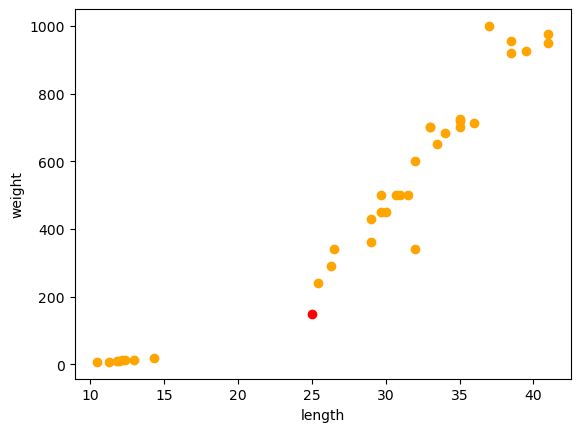

In [102]:
plt.scatter(train_input[:,0],train_input[:,1], c = 'orange', label='Train')
plt.scatter(25.0,150.0,c = 'red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.kneighbors() 메서드는 주어진 샘플에서 가장 가까운 이웃을 찾아준다. <br><br>
아래 코드에서는 생선의 길이와 무게를 넣었다.[[25,150]]<br>
길이는 distances / 무게는 indexes<br>

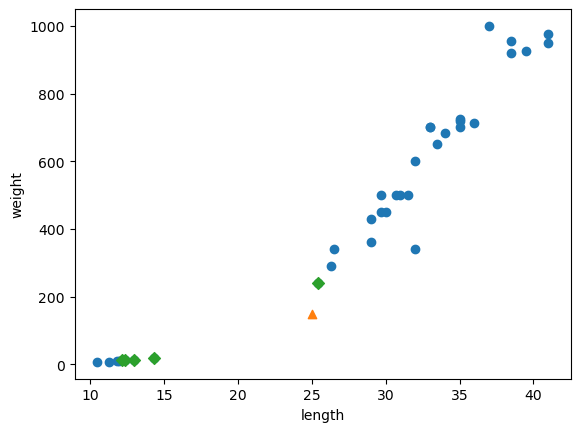

In [ ]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])

plt.scatter(25.0,150.0, marker='^')
# 최근접 값들
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

이웃까지의 거리<br>
y축을 200단위씩 커지고, x축을 5단위로 커진다.<br>
y축으로 조금만 범위가 넓어져도 실제 거리는 x축의 몇배는 될 것이기 때문에 x축으로 많이 이동한것처럼 보인다.

In [103]:
print(distances)

[[ 92.00086956 130.73859415 137.17988191 138.32150953 138.39320793]]


X 범위 조절<br>
x축의 범위를 조절해도 두 값의 범위가 완전히 다르기 때문에 영향을 주지 않는다.<br>
두 값의 범위가 매우 다른 경우는 스케일링을 해야한다.

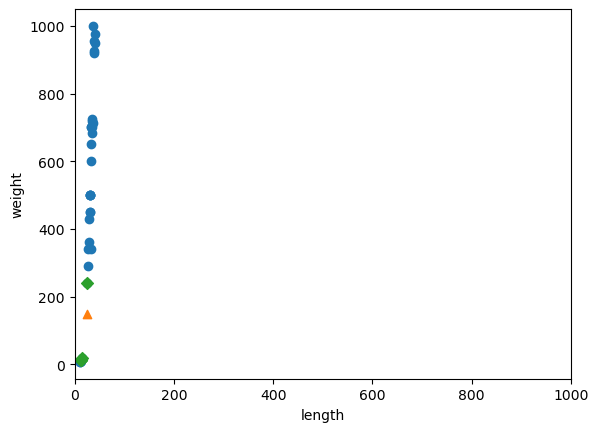

In [106]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker = '^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

axis = 0 -> 열별 계산<br>
열별 평균, 열별 표준편차를 구한다.<br>
표준화 공식(브로드캐스팅) : 기존 데이터 값을 평균으로 빼고 표준 편차로 나누는 것이다. 

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print(mean, std)
train_scaled = (train_input - mean) / std

[ 28.29428571 483.35714286] [  9.54606704 323.47456715]


범위가 동일하게 바꼈다!

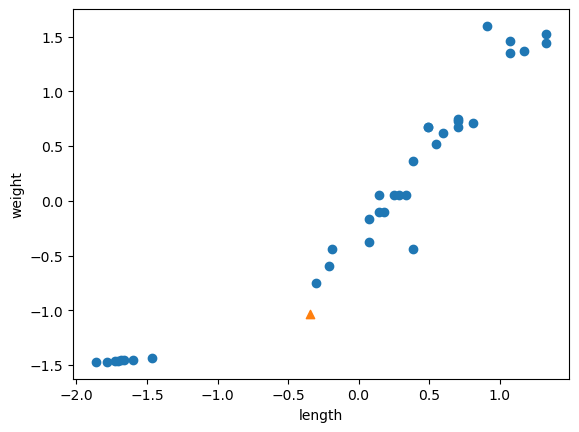

In [121]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [122]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std

kn.score(test_scaled, test_target)
print(kn.predict([new]))

[1]


동일한 범위로 지정하니까 k-nn이 정확하게 바뀌었다.

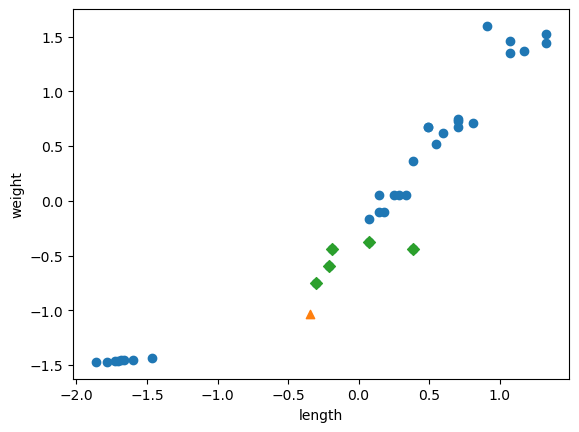

In [ ]:
new = ([25, 150] - mean) / std
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()